 # 【問題1】SVM分類器のクラスを作成する
SVM分類器のクラスを作成し、「機械学習スクラッチ入門」で作成した分類のパイプラインに組み込んでください。

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X = iris.data[50:,:]
y = iris.target[50:]

In [4]:
X = X[:,[2,3]]

In [5]:
y[y==2] = -1

In [6]:
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

In [8]:
class ScratchSVMClassifier():

    def __init__(self, num_iter, lr, bias, Threshold): ##, verbose  verbose
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.Threshold = Threshold
        
#         self.verbose = verbose
        # 損失を記録する配列を用意
#         self.loss = np.zeros(self.iter)
#         self.val_loss = np.zeros(self.iter)

        
#     def _kernel_fnk(self,X1, X2):
#         return X1 @ X2.T
    
    
    def _SVC_hypothesis(self, X, y):
        y = y.reshape(-1,1)
#         y_d = np.dot(y, y.T)
#         y_d = np.dot(y, y.T)
#         y_d = y * y
#         X_d = np.dot(X, X.T)
#         y_d = np.zeros(y.shape)
#         X_d = np.zeros(X.shape)
#         for i in range(X.shape[0]):
#             for j in range(X.shape[1]):
#                 X_d[i,j] = X[i] * X[j]
        for i in range(y.shape[0]):
            temp = 0
            for j in range(y.shape[1]):
                temp += self.lambda_[j] * y[i] * y[j] * np.dot(X[i].T, X[j])
            self.lambda_[i] += self.lr * (1 - temp)
            self.lambda_[self.lambda_ <= 0] = 0
        
#         X_y_d = X_d * y_d.T
#         X_y_lam_d = np.dot(X_y_d, self.lambda_)
#         X_y_lam_d = np.dot(X_y_d, self.lambda_)
#         self.lambda_ += self.lr * (1 - X_y_lam_d.sum())
        return self.lambda_
    

    def fit(self, X, y, X_val=None, y_val=None):
        np.random.seed(0)
        self.lambda_ = np.random.rand(X.shape[0], 1) * 0.03
        
        for i in range(self.iter):
            self._SVC_hypothesis(X, y)
        
        self.index_l = []
        for j, i in enumerate(self.lambda_):
            if i > self.Threshold:
                self.index_l .append(j)
        self.lambda_sv = self.lambda_[self.index_l]
        self.X_sv = X[self.index_l]
        self.y_sv = y[self.index_l]
        
#     def predict(self, X):
#         self.y_pred = np.zeros(X.shape[0])
#         for i in range(self.lambda_sv.shape[0]):
#              self.y_pred += self.lambda_sv[i] * self.y_sv[i] * np.dot(X, self.X_sv[i].T)]
    
    def predict(self, X):
        self.y_pred = 0
        for i in range(self.lambda_sv.shape[0]):
             self.y_pred += self.lambda_sv[i] * self.y_sv[i] * np.dot(X, self.X_sv[i].T)
        
        self.y_pred = np.where(self.y_pred > 0, 1, -1)
            

        return self.y_pred

#121, 162, 326

In [9]:
SV = ScratchSVMClassifier(num_iter=1000, lr = 0.00000001, bias=True, Threshold=0.002)

In [10]:
SV.fit(X,y)
# SV.fit(X_train, y_train)

In [11]:
SV.lambda_

array([[0.01647044],
       [0.02146185],
       [0.01808876],
       [0.0163531 ],
       [0.01271574],
       [0.01938304],
       [0.01313361],
       [0.02676041],
       [0.02891602],
       [0.0115099 ],
       [0.02375881],
       [0.01587325],
       [0.01704801],
       [0.02777394],
       [0.002138  ],
       [0.00262015],
       [0.00061272],
       [0.02498519],
       [0.02335087],
       [0.02610709],
       [0.02936442],
       [0.02398136],
       [0.01385024],
       [0.02342196],
       [0.00355461],
       [0.0192039 ],
       [0.00430656],
       [0.02834581],
       [0.01566162],
       [0.01244692],
       [0.00794347],
       [0.02323392],
       [0.01369121],
       [0.0170587 ],
       [0.00056987],
       [0.01853521],
       [0.01836889],
       [0.01851431],
       [0.02831897],
       [0.02046121],
       [0.01079155],
       [0.01311708],
       [0.02093556],
       [0.00181398],
       [0.02000945],
       [0.02012561],
       [0.00631793],
       [0.003

In [12]:
SV.lambda_sv.shape

(93, 1)

In [13]:
SV.index_l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98]

In [14]:
y_pred = SV.predict(X)

In [15]:
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

 # 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [17]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

In [18]:
SV = ScratchSVMClassifier(num_iter=5000, lr = 0.00001, bias=True, Threshold=0.002)
SV.fit(X_train,y_train)

In [19]:
y_pred = SV.predict(X_test)

In [20]:
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

適合率:0.5
再現率:1.0
F値 :0.6666666666666666
[[ 0 15]
 [ 0 15]]


 # 【問題4】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

これまで使用してきた関数に、サポートベクターを色を変えて表示する機能を加えてください。

特にSprint0で作成したシンプルデータセット1に対して以下のように分類ができるかを検証してください

 ## irisデータ

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    print(y_pred)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[: , 0], model.X_sv[:,1] , color = "green")
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: No contour levels were found within the data range.


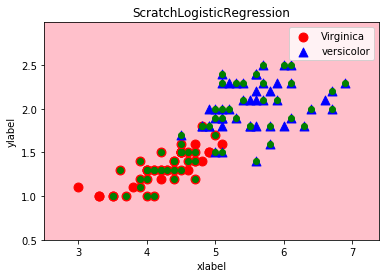

In [22]:
decision_region(X, y, SV, 
                 step=0.01, title='ScratchLogisticRegression',
                 xlabel='xlabel', ylabel='ylabel', 
                 target_names=["Virginica" ,'versicolor'])

 ## データ２

In [23]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [24]:
from matplotlib.colors import ListedColormap

# 可視化関数
def plot_decision_regions(X, model):
    plt.scatter(X[:,0], X[:,1], s=80, c=y, marker='o')
    #print(model.sv_lt)
    for sv in model.X_sv:
        plt.scatter(sv[0], sv[1], s=80, c='c', marker='o')
    
    #サポートベクターも同様にプロット
    step = 0.1
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.contour(mesh_f0, mesh_f1, pred, 1)
    plt.show()

In [25]:
SV = ScratchSVMClassifier(num_iter=10000, lr = 0.000001, bias=True, Threshold=0.038)

In [26]:
SV.fit(X,y)

In [27]:
SV.lambda_

array([[0.02524235],
       [0.03056119],
       [0.02751431],
       [0.02462961],
       [0.02227951],
       [0.02850404],
       [0.02308177],
       [0.03622044],
       [0.03797475],
       [0.02035634],
       [0.03296669],
       [0.0249605 ],
       [0.0263031 ],
       [0.03719178],
       [0.01129747],
       [0.01122357],
       [0.00959207],
       [0.03438535],
       [0.03295564],
       [0.03532179],
       [0.03820948],
       [0.03275323],
       [0.02252654],
       [0.03280232],
       [0.01249668],
       [0.02783967],
       [0.0135127 ],
       [0.03763095],
       [0.02429309],
       [0.02157627],
       [0.01682903],
       [0.03207081],
       [0.02243033],
       [0.02633016],
       [0.00883989],
       [0.02722211],
       [0.02724383],
       [0.02733341],
       [0.03747399],
       [0.02940017],
       [0.01978606],
       [0.02226262],
       [0.03001079],
       [0.01057337],
       [0.02914471],
       [0.02939613],
       [0.0155822 ],
       [0.012

In [28]:
SV.lambda_sv.shape

(24, 1)

In [29]:
y_pred = SV.predict(X)
y_pred

array([-1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,
        1,  1, -1,  1,  1

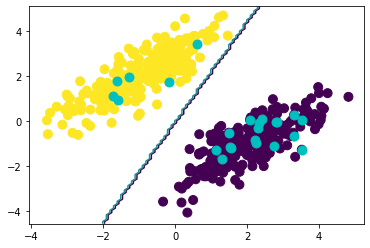

In [30]:
plot_decision_regions(X,SV)

[[ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 ...
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]


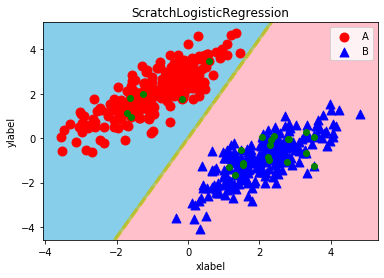

In [31]:
decision_region(X, y, SV, 
                 step=0.01, title='ScratchLogisticRegression',
                 xlabel='xlabel', ylabel='ylabel', 
                 target_names=["A" ,'B'])

 ## データ3

In [32]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
SV = ScratchSVMClassifier(num_iter=10000, lr = 0.000001, bias=True, Threshold=0.035)

In [34]:
SV.fit(X,y)

In [35]:
SV.lambda_

array([[0.02646441],
       [0.03145568],
       [0.0280829 ],
       [0.0263465 ],
       [0.02270964],
       [0.02937682],
       [0.02312762],
       [0.03675319],
       [0.03890988],
       [0.02150325],
       [0.03375175],
       [0.02586685],
       [0.02704134],
       [0.0377679 ],
       [0.01213108],
       [0.01261388],
       [0.01060655],
       [0.0349786 ],
       [0.0333447 ],
       [0.03610036],
       [0.03935855],
       [0.03397476],
       [0.02384438],
       [0.03341588],
       [0.01354823],
       [0.02919763],
       [0.0143006 ],
       [0.03834007],
       [0.02565545],
       [0.02243986],
       [0.01793667],
       [0.03322701],
       [0.02368451],
       [0.02705302],
       [0.01056369],
       [0.02852906],
       [0.02836287],
       [0.02850802],
       [0.03831244],
       [0.03045461]])

In [36]:
SV.lambda_sv.shape

(7, 1)

In [37]:
y_pred = SV.predict(X)
y_pred

array([-1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1])

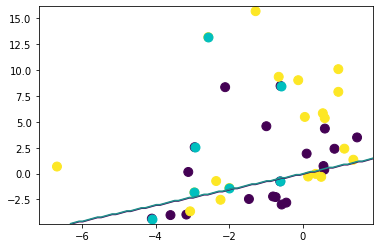

In [38]:
plot_decision_regions(X,SV)

[[ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]


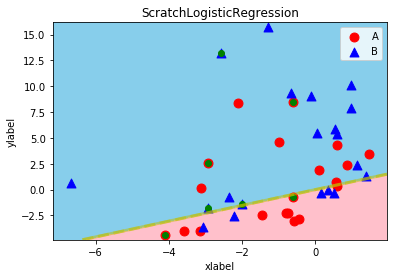

In [39]:
decision_region(X, y, SV, 
                 step=0.01, title='ScratchLogisticRegression',
                 xlabel='xlabel', ylabel='ylabel', 
                 target_names=["A" ,'B'])

 # 【問題5】時間の計測
SVMの学習には時間がかかるため、効率的な実装が望まれます。事前学習期間に行なったように、時間を計測して改善していきましょう。特に 
λ
 の更新部分は繰り返し処理が多いため、効率的なコードを目指してください。

In [40]:
import time
t0 = time.time()
SV.fit(X_train , y_train)
t1 = time.time()
print('time : {}s'.format(t1-t0))

time : 8.26259708404541s


 # 【問題6】ロジスティック回帰とSVM
<br>　
 - ロジスティック回帰 : 
<br>
シグモイド関数により片方になる確率を０〜１の値で求める
<br>　
 - SVM : 
<br>
データを分類するための境界線を決定する際に、境界線から近いサンプルデータまでのマージンの和が最大になる境界線を求め分類する手法。処理が複雑なため、学習に時間がかかる。